## Rice Type Classification

This is a set of data created for rice classification. 

### Content
What's inside is more than just rows and columns. You can see rice details listed as column names.

### Description
All attributes are numeric variables and they are listed bellow:

- id
- Area
- MajorAxisLength
- MinorAxisLength
- Eccentricity
- ConvexArea
- EquivDiameter
- Extent
- Perimeter
- Roundness
- AspectRation
- Class

#### Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
##Locally loading
df = pd.read_csv('../Datasets/riceClassification.csv')
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [3]:
#Another option to load the dataset
# import opendatasets as od
# od.download("https://www.kag/gle.com/datasets/mssmartypants/rice-type-classification")

### Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [5]:
# ## droping the id column and missing values
# df=df.drop(columns=['id'])
# df=df.dropna()
df.dropna(inplace=True)
df.drop(['id'],axis=1,inplace=True)
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


In [7]:
df.shape

(18185, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


In [9]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [10]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df['Class'].value_counts()

Class
1    9985
0    8200
Name: count, dtype: int64

In [14]:
df['Class'].unique()

array([1, 0])

### Data Preprocessing
- Normalization (to get a value in a certain range)

In [15]:
original_data=df.copy() ## Save our original data for inference

In [16]:
## Divide each column by its maximum value
for column in df.columns:
    df[column]=df[column]/df[column].abs().max()
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


### Divide dataset into train & test split

In [17]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values


In [18]:
## Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12729, 10)
(5456, 10)
(12729,)
(5456,)


In [20]:
## Now divide the testing data into 15 & 15 testing and validation
X_test,X_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

In [21]:
print(X_test.shape)
print(X_val.shape)
print(y_test.shape)
print(y_val.shape)

(2728, 10)
(2728, 10)
(2728,)
(2728,)


### Using pytorch dataset and loader class

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [23]:
## dataset class from pytorch

class dataset(Dataset):
    def __init__(self,X,Y):
        self.X=torch.tensor(X,dtype=torch.float32).to(device)
        self.Y=torch.tensor(Y,dtype=torch.float32).to(device)

    def __len__(self):
        return len(self.X)
        
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

### Create object for training, validation and testing

In [24]:
training_data=dataset(x_train,y_train)
validation_data=dataset(X_val,y_val)
testing_data=dataset(X_test,y_test)

In [25]:
# Print shape of a single sample
x0, y0 = training_data[0]
print("Training sample shape:", x0.shape, y0.shape)

x1, y1 = validation_data[0]
print("Validation sample shape:", x1.shape, y1.shape)

x2, y2 = testing_data[0]
print("Testing sample shape:", x2.shape, y2.shape)


Training sample shape: torch.Size([10]) torch.Size([])
Validation sample shape: torch.Size([10]) torch.Size([])
Testing sample shape: torch.Size([10]) torch.Size([])


### Creating a dataloadet class
- load the dataset and loop over the entire data

In [26]:
train_dataloader=DataLoader(training_data,batch_size=10,shuffle=True)
validation_dataloader=DataLoader(validation_data,batch_size=10,shuffle=True)
testing_dataloader=DataLoader(testing_data,batch_size=10,shuffle=True)

In [27]:
# Print shapes from the first batch of each dataloader
for xb, yb in train_dataloader:
    print("Train batch shape:", xb.shape, yb.shape)
    break

for xb, yb in validation_dataloader:
    print("Validation batch shape:", xb.shape, yb.shape)
    break

for xb, yb in testing_dataloader:
    print("Test batch shape:", xb.shape, yb.shape)
    break


Train batch shape: torch.Size([10, 10]) torch.Size([10])
Validation batch shape: torch.Size([10, 10]) torch.Size([10])
Test batch shape: torch.Size([10, 10]) torch.Size([10])


### Create a Model

In [28]:
# class MyModel(nn.Module):
#     def __init__(self,input_size,hidden_size,output_size):
#         super(MyModel,self).__init__()
#         self.fc1=nn.Linear(input_size,hidden_size)
#         self.fc2=nn.Linear(hidden_size,output_size)
#     def forward(self,x):
#         x=torch.relu(self.fc1(x))
#         x=self.fc2(x)
#         return x

# model=MyModel(input_size=11,hidden_size=10,output_size=3)
# model.to(device)

# criterion=nn.CrossEntropyLoss()
# optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

# epochs=100

In [29]:
HIDDEN_NEURONS=10
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel,self).__init__()
        self.input_Layer=nn.Linear(X.shape[1],HIDDEN_NEURONS)
        self.linear=nn.Linear(HIDDEN_NEURONS,1)
        self.sigmoid=nn.Sigmoid()

    def forward(self,x):
        x=self.input_Layer(x)
        x=self.linear(x)
        x=self.sigmoid(x)
        return x

model=MyModel().to(device)

In [30]:
summary(model,(X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [31]:
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [32]:
total_loss_train_plot=[]
total_loss_validation_plot=[]
total_accuracy_train_plot=[]
total_accuracy_validation_plot=[]
#Training the model
EPOCHS=10
for epoch in range(EPOCHS):

    total_loss_train=0
    total_acc_train=0
    total_loss_val=0
    total_accuracy_val=0

    for data in train_dataloader:
        input,label=data
        output=model(input)

        prediction=model(input).squeeze(1) ##squeeze is used to remove the extra dimension
        
        batch_loss_train=criterion(prediction,label)
        
        total_loss_train+=batch_loss_train.item()
        
        acc=((prediction).round()==label).sum().item()
        # print(accuracy)
        total_acc_train+=acc
        batch_loss_train.backward()
        optimizer.step()
        optimizer.zero_grad()
    with torch.no_grad():
        for data in validation_dataloader:
            input,label=data
            prediction=model(input).squeeze(1)  
            batch_loss_val=criterion(prediction,label)
            total_loss_val+=batch_loss_val.item()
            acc=((prediction).round()==label).sum().item()
            total_accuracy_val+=acc
    total_loss_train_plot.append(round(total_loss_train/1000,4))
    total_accuracy_train_plot.append(round(total_acc_train/training_data.__len__()*100,4))
    total_loss_validation_plot.append(round(total_loss_val/1000,4))
    total_accuracy_validation_plot.append(round(total_accuracy_val/validation_data.__len__()*100,4))
    print(f"Epoch {epoch+1}/{EPOCHS}, Training Loss: {total_loss_train_plot[-1]:.4f}, Training Accuracy: {total_accuracy_train_plot[-1]:.4f}, Validation Loss: {total_loss_validation_plot[-1]:.4f}, Validation Accuracy: {total_accuracy_validation_plot[-1]:.4f}")


Epoch 1/10, Training Loss: 0.5697, Training Accuracy: 86.0869, Validation Loss: 0.0457, Validation Accuracy: 98.1305
Epoch 2/10, Training Loss: 0.1332, Training Accuracy: 98.3816, Validation Loss: 0.0187, Validation Accuracy: 98.6070
Epoch 3/10, Training Loss: 0.0770, Training Accuracy: 98.4681, Validation Loss: 0.0141, Validation Accuracy: 98.6070
Epoch 4/10, Training Loss: 0.0632, Training Accuracy: 98.5388, Validation Loss: 0.0128, Validation Accuracy: 98.6070
Epoch 5/10, Training Loss: 0.0590, Training Accuracy: 98.4759, Validation Loss: 0.0135, Validation Accuracy: 98.2405
Epoch 6/10, Training Loss: 0.0565, Training Accuracy: 98.5073, Validation Loss: 0.0132, Validation Accuracy: 98.5337
Epoch 7/10, Training Loss: 0.0556, Training Accuracy: 98.5623, Validation Loss: 0.0122, Validation Accuracy: 98.5704
Epoch 8/10, Training Loss: 0.0552, Training Accuracy: 98.5938, Validation Loss: 0.0120, Validation Accuracy: 98.5704
Epoch 9/10, Training Loss: 0.0542, Training Accuracy: 98.5388, V

In [33]:
with torch.no_grad():
    total_loss_test = 0
    total_accuracy_test = 0

    for data in testing_dataloader:
        input,label=data
        predictions = model(input).squeeze(1)
        batch_loss_test = criterion(predictions, label).item()
        total_loss_test += batch_loss_test
        total_accuracy_test += (predictions.round() == label).sum().item()
print("Accuracy of the model is: ",round(total_accuracy_test/testing_data.__len__()*100,4))

Accuracy of the model is:  98.7903


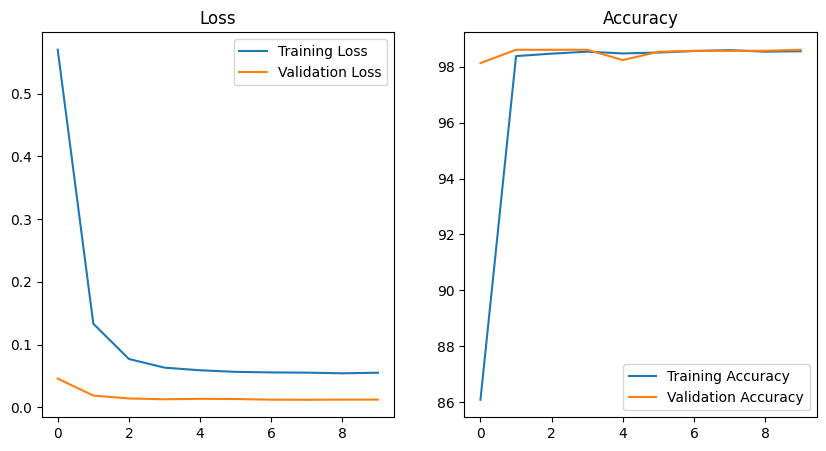

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10')]

In [34]:
fig ,axis=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axis[0].plot(total_loss_train_plot,label="Training Loss")
axis[0].plot(total_loss_validation_plot,label="Validation Loss")
axis[0].set_title("Loss")
axis[0].legend()
axis[1].plot(total_accuracy_train_plot,label="Training Accuracy")
axis[1].plot(total_accuracy_validation_plot,label="Validation Accuracy")
axis[1].set_title("Accuracy")
axis[1].legend()
plt.show()

axis[1].plot(total_accuracy_train_plot,label="Training Accuracy")
axis[1].plot(total_accuracy_validation_plot,label="Validation Accuracy")
axis[1].set_title("Accuracy")
axis[1].legend()
axis[1].set_xlabel("Epochs")
axis[1].set_ylabel("Accuracy")
axis[1].grid(True)
axis[1].set_ylim(0,100)
axis[1].set_xlim(0,EPOCHS)
axis[1].set_xticks(np.arange(0,EPOCHS+1,1))
axis[1].set_yticks(np.arange(0,101,10))
axis[1].set_xticklabels(np.arange(0,EPOCHS+1,1))
axis[1].set_yticklabels(np.arange(0,101,10))
axis[1].set_xticklabels(np.arange(0,EPOCHS+1,1))

### Testing

In [35]:
area=2332/original_data['Area'].abs().sum()
MajorAxisLength=233/original_data['MajorAxisLength'].abs().sum()
MinorAxisLength=332/original_data['MinorAxisLength'].abs().sum()
Eccentricity=32/original_data['Eccentricity'].abs().sum()
ConvexArea=32/original_data['ConvexArea'].abs().sum()
EquivDiameter=2332/original_data['EquivDiameter'].abs().sum()
Roundness=22/original_data['Roundness'].abs().sum()
Extent=2/original_data['Extent'].abs().sum()
Perimeter=332/original_data['Perimeter'].abs().sum()
AspectRation=52/original_data['AspectRation'].abs().sum()

In [36]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [37]:
my_pred=model(torch.tensor([area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Roundness,Extent,Perimeter,AspectRation],dtype=torch.float32).to(device))

In [38]:
my_pred

tensor([0.9983], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [39]:
if my_pred>0.5:
    print("1")
else:
    print("0")

1
